In [1]:
#Importar Bibliotecas necesarias para el analisis
import numpy as np
import pandas as pd
import re


In [2]:
#Importar Bibliotecas de Visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import bokeh.plotting as bkplt
from bokeh.io import output_file, show
from bokeh.layouts import gridplot, column
from bokeh.models import HoverTool, Div

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/felipeolivares/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#Importar bibliotecas para analisis de Contenido
from nltk.corpus import stopwords
from wordcloud import WordCloud
import emoji
from collections import Counter

In [5]:
mi_nombre = "Carlos"

In [6]:
#Ingresar el nombre del archivo que van a analizar
file = open(r'Profe.txt',mode='r',encoding="utf8")
data = file.read()
file.close()

In [7]:
def split_text(data):
  ##  Generamos una linea por cada salto de linea.
    return data.splitlines()

In [8]:
LineasChat = split_text(data)
LineasChat

['3/7/2019 09:26 - Los mensajes y las llamadas están cifrados de extremo a extremo. Nadie fuera de este chat, ni siquiera WhatsApp, puede leerlos ni escucharlos. Toca para obtener más información.',
 '3/7/2019 09:26 - Carlos: Si buenas',
 '3/7/2019 10:16 - Amorcito: <Multimedia omitido>',
 '3/7/2019 10:16 - Amorcito: Mor mira si así es',
 '3/7/2019 10:45 - Amorcito: Mor revisa car eventos haber si vez',
 '3/7/2019 11:05 - Carlos: Ya ma gracias 😍😍',
 '3/7/2019 11:18 - Carlos: Ma y el grupo es feriados',
 '3/7/2019 13:18 - Amorcito: Mor revisa el correo',
 '3/7/2019 13:56 - Carlos: Donde anda la señora',
 '3/7/2019 15:51 - Amorcito: Trabajando mucho',
 '3/7/2019 15:51 - Amorcito: Experta en fotocopiadora',
 '3/7/2019 16:53 - Carlos: Jajajajaja',
 '3/7/2019 21:39 - Amorcito: <Multimedia omitido>',
 '4/7/2019 19:38 - Carlos: <Multimedia omitido>',
 '4/7/2019 20:54 - Carlos: <Multimedia omitido>',
 '5/7/2019 08:19 - Amorcito: Mor tienes el cel nuevo de tu compañero Cristian, lo necesita Áng

In [9]:
len(LineasChat)

1791

In [10]:
#busco la fecha con regex y hago una lista con todas las fechas
def fecha(LineasChat):
    fecha = []
    print("Aqui vamossss crackk")
    regTime = re.compile("\d+/\d+/\d+")
    for index, line in enumerate(LineasChat):
        matches = re.findall(regTime, line)
        if(len(matches) > 0):
            fecha.append(matches[0])
        else:
            fecha.append(None)
    return fecha

In [11]:
#busco la hora con regex y hago una lista con todas las horas
def hora(LineasChat):
    hora = []
    regTime = re.compile("\d+:\d+")
    for index, line in enumerate(LineasChat):
        matches = re.findall(regTime, line)
        if(len(matches) > 0):
            match = matches[0]
           
            if "p" in match:
                hour = int(match.split(":")[0])
                if hour == 24:
                    hour = 12
                elif hour<12:
                    hour = hour+12
                hora.append((str(hour)+":"+(match.split(":")[1])[0:2]))
            else:
                hour = int(match.split(":")[0])
                if hour == 12:
                    hour = 0
                hora.append((str(hour)+":"+(match.split(":")[1])[0:2]))
        else:
            hora.append(None)
    

    return hora

In [12]:
#busco el remitente con regex y hago una lista con los rttes de cada mensaje
def rtte(LineasChat):
    sender = []
    rtteRegex = re.compile('([a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?):\s+')
    for index, line in enumerate(LineasChat):
        matches = re.findall(rtteRegex, line)
        if(len(matches) > 0):
            sender.append(matches[0])
        else:
            sender.append(None)
    
    return sender

In [13]:
#extraigo el mensaje con regex (todo lo que esté despues del remitente, hasta el salto de linea)
def mensaje(LineasChat):
    mensaje = []
    msgRegex = re.compile('\s[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?:\s+(.+)')
    for index, line in enumerate(LineasChat):
        matches = re.findall(msgRegex, line)
        if(len(matches) > 0):
            mensaje.append(matches[0])
        else:
            mensaje.append(None)
    return mensaje

In [14]:
fechas = fecha(LineasChat)

Aqui vamossss crackk


In [15]:
horas = hora(LineasChat)

In [16]:
senders = rtte(LineasChat)

In [17]:
mensajes = mensaje(LineasChat)

In [18]:
#si es false, revisar código previo
len(mensajes) == len(fechas) == len(horas) == len(senders)

True

In [19]:
#armo una lista de listas con cada columna de datos extraidos
zipped = list(zip(fechas, horas, senders, mensajes))
zipped

[('3/7/2019', '9:26', None, None),
 ('3/7/2019', '9:26', 'Carlos', 'Si buenas'),
 ('3/7/2019', '10:16', 'Amorcito', '<Multimedia omitido>'),
 ('3/7/2019', '10:16', 'Amorcito', 'Mor mira si así es'),
 ('3/7/2019', '10:45', 'Amorcito', 'Mor revisa car eventos haber si vez'),
 ('3/7/2019', '11:05', 'Carlos', 'Ya ma gracias 😍😍'),
 ('3/7/2019', '11:18', 'Carlos', 'Ma y el grupo es feriados'),
 ('3/7/2019', '13:18', 'Amorcito', 'Mor revisa el correo'),
 ('3/7/2019', '13:56', 'Carlos', 'Donde anda la señora'),
 ('3/7/2019', '15:51', 'Amorcito', 'Trabajando mucho'),
 ('3/7/2019', '15:51', 'Amorcito', 'Experta en fotocopiadora'),
 ('3/7/2019', '16:53', 'Carlos', 'Jajajajaja'),
 ('3/7/2019', '21:39', 'Amorcito', '<Multimedia omitido>'),
 ('4/7/2019', '19:38', 'Carlos', '<Multimedia omitido>'),
 ('4/7/2019', '20:54', 'Carlos', '<Multimedia omitido>'),
 ('5/7/2019',
  '8:19',
  'Amorcito',
  'Mor tienes el cel nuevo de tu compañero Cristian, lo necesita Ángela haber si le syudas'),
 ('6/7/2019', '

In [20]:
#armo dataframe, tiro los nan (casos en que el mensaje tenia saltos de linea), y reseteo el index
df = pd.DataFrame(zipped, columns = ['Fecha' , 'Hora','Remitente', 'Mensaje'])
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [21]:
def groupByHour(hora):
    # generamos grupos para cada hora
    time_groups = {}
    for i in range(24):
        time_groups[str(i)] = 0  

   
    for time in hora:
        # extraemos solo la información horaria
        hour = time.split(":")[0]
        time_groups[hour] += 1

    return time_groups

In [22]:
time_groups = groupByHour(df['Hora'])

In [23]:
def plot_graph(time_groups):
    plt.figure(figsize=(10,6))
    plt.bar(range(len(time_groups)), list(
    time_groups.values()), align='center')
    plt.xticks(range(len(time_groups)), list(time_groups.keys()))
    plt.xlabel('Intervalos de una hora')
    plt.ylabel('Frecuencia')
    plt.title("Análisis horarios - Chat total")
    plt.grid(1)
    plt.show()

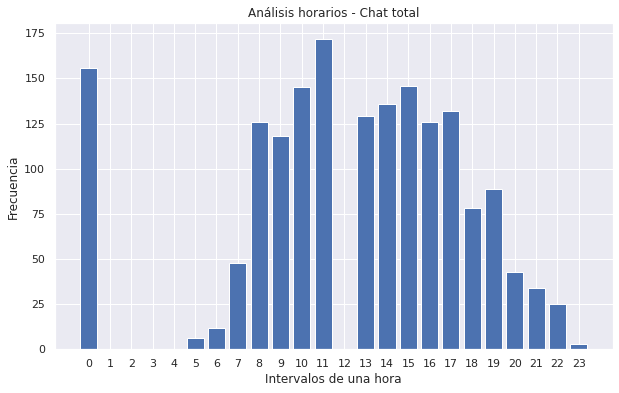

In [24]:
plot_graph(time_groups)

In [25]:
mi_df = df[df['Remitente']==mi_nombre]
otro_df = df[df['Remitente'] !=mi_nombre]

In [26]:
df[df['Remitente']==mi_nombre]

,Fecha,Hora,Remitente,Mensaje
0,3/7/2019,9:26,Carlos,Si buenas
4,3/7/2019,11:05,Carlos,Ya ma gracias 😍😍
5,3/7/2019,11:18,Carlos,Ma y el grupo es feriados
7,3/7/2019,13:56,Carlos,Donde anda la señora
10,3/7/2019,16:53,Carlos,Jajajajaja
...,...,...,...,...
1718,8/10/2020,14:36,Carlos,😘😘😘
1719,8/10/2020,16:58,Carlos,<Multimedia omitido>
1720,8/10/2020,16:58,Carlos,Aquí viendo tele
1722,8/10/2020,17:03,Carlos,Ok


In [27]:
mi_time_groups = groupByHour(mi_df['Hora'])
otro_time_groups = groupByHour(otro_df['Hora'])

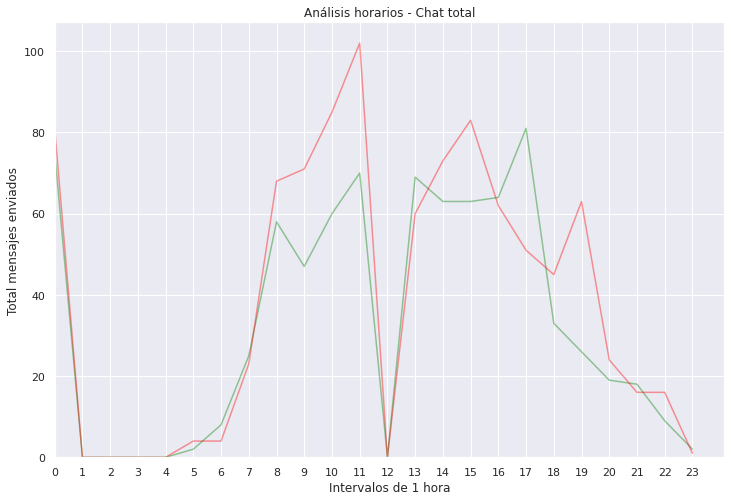

In [28]:
plt.figure(figsize=(12,8))
plt.plot(range(len(mi_time_groups)), list(mi_time_groups.values()),  color='green', alpha=0.4)
plt.plot(range(len(otro_time_groups)), list(otro_time_groups.values()), color='red', alpha=0.4)
plt.xticks(range(len(mi_time_groups)), list(mi_time_groups.keys()))
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Intervalos de 1 hora')
plt.ylabel('Total mensajes enviados')
plt.title("Análisis horarios - Chat total")
plt.legend.location = 'top_left'
plt.grid(1)
plt.show()

In [29]:
def split_count(text):

    emoji_list = []
    data = text
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

total_mensajes = df.shape[0]
media_mensajes = df[df['Mensaje'] == '<Multimedia omitido>'].shape[0]
df["emoji"] = df["Mensaje"].apply(split_count)
emojis = sum(df['emoji'].str.len())
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Mensaje.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

In [30]:
print("Total mensajes: ",total_mensajes)
print("Multimedia: ",media_mensajes)
print("Emojis: ",emojis)
print("Links: ",links)

Total mensajes:  1724
Multimedia:  670
Emojis:  370
Links:  40


In [31]:
df['Cant letras'] = df['Mensaje'].apply(lambda s : len(s))
df['Cant Palabras'] = df['Mensaje'].apply(lambda s : len(s.split(' ')))

In [32]:
media_mensajes_df = df[df['Mensaje'] == '<Multimedia omitido>']
df2 = df.drop(media_mensajes_df.index)

In [33]:
#Serie temporal

In [34]:
totales = df2.groupby(["Fecha", "Remitente"]).agg(CantMsg=('Mensaje', 'count'), CantPalabras=('Cant Palabras', 'sum')).reset_index()

In [35]:
totales.index = pd.DatetimeIndex(totales.Fecha, dayfirst=True)
totales.drop("Fecha", axis=1, inplace=True)

In [36]:
totales['month'] = [d.strftime('%b') for d in totales.index]
totales['day'] = [d.strftime('%A') for d in totales.index]
totales = totales.sort_values(by = "Fecha")

In [37]:
totales_msg_mes = totales.groupby(["Fecha"])["CantMsg", "CantPalabras"].sum()
totales_msg_mes = totales_msg_mes.resample('MS').sum()

<ipython-input-37-f4520f21483a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totales_msg_mes = totales.groupby(["Fecha"])["CantMsg", "CantPalabras"].sum()


In [38]:
totales_msg_mes_me = totales[totales["Remitente"]==mi_nombre].groupby(["Fecha"])["CantMsg", "CantPalabras"].sum()
totales_msg_mes_me = totales_msg_mes_me.resample('MS').sum()

<ipython-input-38-51132718291a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totales_msg_mes_me = totales[totales["Remitente"]==mi_nombre].groupby(["Fecha"])["CantMsg", "CantPalabras"].sum()


In [39]:
totales_msg_mes_not_me = totales[totales["Remitente"]!=mi_nombre].groupby(["Fecha"])["CantMsg", "CantPalabras"].sum()
totales_msg_mes_not_me = totales_msg_mes_not_me.resample('MS').sum()

<ipython-input-39-31ffadec9e43>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totales_msg_mes_not_me = totales[totales["Remitente"]!=mi_nombre].groupby(["Fecha"])["CantMsg", "CantPalabras"].sum()


In [40]:
mi_hover_tool = HoverTool(
                tooltips=[("Fecha","@x{%F}"), ("Cantidad", "@y{int}")], formatters={"@x":"datetime"} )

def plottotal( x1, y1,  title, color,  y_axis_label):
    plot = bkplt.figure(x_axis_type="datetime", title=title,  plot_height=350, plot_width=650, tools = 'pan, box_zoom')
    plot.line(x1, y1,  legend_label="Valor de cada mes", color=color)
    plot.circle(x1, y1,   color=color)
    plot.xgrid.grid_line_color=None
    plot.ygrid.grid_line_alpha=0.5
    plot.xaxis.axis_label = 'Fecha'
    plot.yaxis.axis_label = y_axis_label
    plot.legend.location = 'bottom_left'
    plot.add_tools(mi_hover_tool)
    return plot

In [41]:
def plotcompartido( x1, y1, x2, y2, title, color, color2, y_axis_label):
    plot = bkplt.figure(x_axis_type="datetime", title=title,  plot_height=350, plot_width=650, tools = 'pan, box_zoom')
    plot.line(x1, y1,  legend_label="Cantidad enviada por mí", color=color)
    plot.circle(x1, y1,   color=color)
    plot.line(x2, y2,  color = color2, legend_label="Cantidad recibida")
    plot.square(x2, y2,  color = color2,  )
    plot.xgrid.grid_line_color=None
    plot.ygrid.grid_line_alpha=0.5
    plot.xaxis.axis_label = 'Fecha'
    plot.yaxis.axis_label = y_axis_label
    plot.legend.location = 'bottom_left'
    plot.add_tools(mi_hover_tool)
    return plot

In [42]:
plotMensajes = plottotal(totales_msg_mes.index, totales_msg_mes.CantMsg, "Total de mensajes", "blue", "Valores mes")
#show(plotMensajes)

In [43]:
plotPalabras = plottotal(totales_msg_mes.index, totales_msg_mes.CantPalabras, "Total de palabras", "green", "Palabras por mes")
#show(plotPalabras)

In [44]:
plotMensajes2 = plotcompartido(totales_msg_mes_me.index, totales_msg_mes_me.CantMsg, totales_msg_mes_not_me.index, totales_msg_mes_not_me.CantMsg, "Mensajes enviados", "red", "green", "Valores mes")

In [45]:
plotPalabras2 = plotcompartido(totales_msg_mes_me.index, totales_msg_mes_me.CantPalabras, totales_msg_mes_not_me.index, totales_msg_mes_not_me.CantPalabras, "Palabras enviadas", "red", "green", "Palabras por mes")

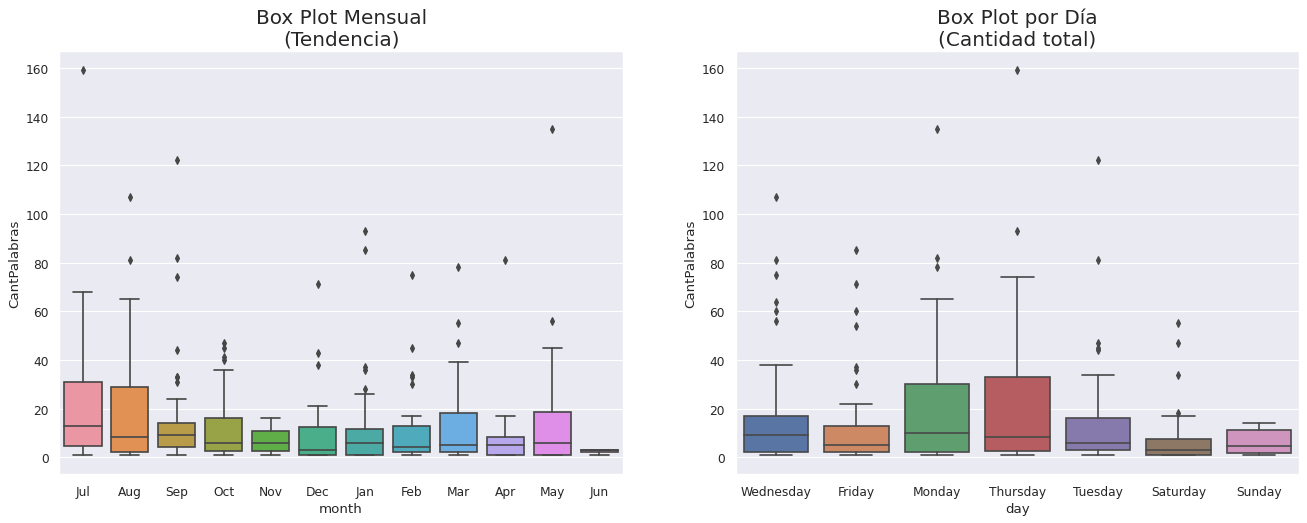

In [46]:
# Definimos los plots:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='month', y="CantPalabras", data=totales, ax=axes[0])
sns.boxplot(x='day', y='CantPalabras', data=totales)

# Seteamos los títulos:
axes[0].set_title('Box Plot Mensual\n(Tendencia)', fontsize=18); 
axes[1].set_title('Box Plot por Día\n(Cantidad total)', fontsize=18)
plt.show()

In [47]:
#Analizando los emojis
total_emojis_list = list([a for b in df2.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
agregados_emoji = emoji_df[(emoji_df['emoji'] == '♀')|(emoji_df['emoji'] == '🏻')]
emoji_df.drop(agregados_emoji.index, inplace=True)
emoji_df = emoji_df.head(10)
cantmaxemojis = emoji_df.iloc[0,1]
emoji_df


,emoji,count
0,😘,67
1,🤭,36
2,🤗,35
3,☹,34
4,👏,33
5,😱,18
6,🙏,17
8,🙈,12
9,😭,10
10,🐶,8


In [48]:
my_emojis_list = list([a for b in df2[df2['Remitente']==mi_nombre].emoji for a in b])
emoji_me_dict = dict(Counter(my_emojis_list))
emoji_me_dict = sorted(emoji_me_dict.items(), key=lambda x: x[1], reverse=True)

my_emoji_df = pd.DataFrame(emoji_me_dict, columns=['emoji', 'count'])
agregados_emoji_me = my_emoji_df[(my_emoji_df['emoji'] == '♀')|(my_emoji_df['emoji'] == '🏻')]
my_emoji_df.drop(agregados_emoji_me.index, inplace=True)
my_emoji_df = my_emoji_df.head(10)
my_emoji_df

,emoji,count
0,😘,28
2,☹,13
3,👏,10
4,😍,6
5,😭,6
6,😡,5
7,🤬,3
8,🙏,3
9,👍,3
10,😆,3


In [49]:
other_emojis_list = list([a for b in df2[df2['Remitente']!=mi_nombre].emoji for a in b])
emoji_other_dict = dict(Counter(other_emojis_list))
emoji_other_dict = sorted(emoji_other_dict.items(), key=lambda x: x[1], reverse=True)
other_emoji_df = pd.DataFrame(emoji_other_dict, columns=['emoji', 'count'])
agregados_emoji_other = other_emoji_df[(other_emoji_df['emoji'] == '♀')|(other_emoji_df['emoji'] == '🏻')]
other_emoji_df.drop(agregados_emoji_other.index, inplace=True)
other_emoji_df = other_emoji_df.head(10)
other_emoji_df

,emoji,count
0,😘,39
1,🤭,36
2,🤗,35
3,👏,23
4,☹,21
5,😱,18
6,🙏,14
7,🙈,9
8,😳,8
9,🐶,6


In [50]:
from bokeh.models import ColumnDataSource, Grid, HBar, LinearAxis, Plot
from bokeh.palettes import Spectral10
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [51]:

mi_hover_tool2 = HoverTool(
                tooltips=[("Cantidad","@counts"), ("Emoji", "@emojis")],  )
source = ColumnDataSource(data=dict(emojis=my_emoji_df['emoji'], counts=my_emoji_df['count'], color=Spectral10))


p_my_emojis = bkplt.figure(
  x_range=my_emoji_df['emoji'],
  y_range=(0,cantmaxemojis),
  title = 'Mis emojis más enviados',
  y_axis_label ='Cantidad veces utilizada',
  plot_width=650,
  plot_height=350,
  tools = 'pan, box_zoom'
)



p_my_emojis.xaxis.major_label_text_font_size = '20px'

p_my_emojis.vbar('emojis', width=0.6, top='counts', color='color', source=source,  fill_alpha=0.7, 
                 #legend="emojis"
                )



p_my_emojis.add_tools(mi_hover_tool2)
# show the results 
show(p_my_emojis)

In [52]:
mi_hover_tool22= HoverTool(
                tooltips=[("Cantidad","@counts"), ("Emoji", "@emojis")],  )
source2 = ColumnDataSource(data=dict(emojis=other_emoji_df['emoji'], counts=other_emoji_df['count'], color=Spectral10))


p_other_emojis = bkplt.figure(
  x_range=other_emoji_df['emoji'],
  y_range=(0,cantmaxemojis*1.1),
  title = 'Sus emojis más enviados',
  y_axis_label ='Cantidad veces utilizada',
  plot_width=650,
  plot_height=350,
  tools = 'pan, box_zoom'
)
p_other_emojis.vbar('emojis', width=0.6, top='counts', color='color', source=source2,  fill_alpha=0.7,
                    #legend="emojis"
                   )

p_other_emojis.xaxis.major_label_text_font_size = '20px'


p_other_emojis.add_tools(mi_hover_tool22)
# show the results 
show(p_other_emojis)

In [53]:
#Texto
textomensajes = df2['Mensaje'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)

textomensajes = textomensajes.translate(trans)

In [54]:
textomensajes = re.sub('\s*(j*a*ja\w*)\s\w*|(j*a*ja\w*)$', '\\1-jajaja ', textomensajes)

In [55]:
stop_words_sp = set(stopwords.words('spanish'))
stop_words_sp.update(["sip","nono","ahh", "ahhh","meno","ay","tene","nooo","ir","asi","tenia","iba","ser","estan","https","jajaj","pa", "eh", "si", "no", "ah", "che", "sisi", "sii","siii","aca","ahi","ahí","tmb","encima","re","desp","nah","tan", "siiii","oki","re","dp","porq","xq","tb","do","ma","capaz","so","vo","solo", "https", "http", "www"])

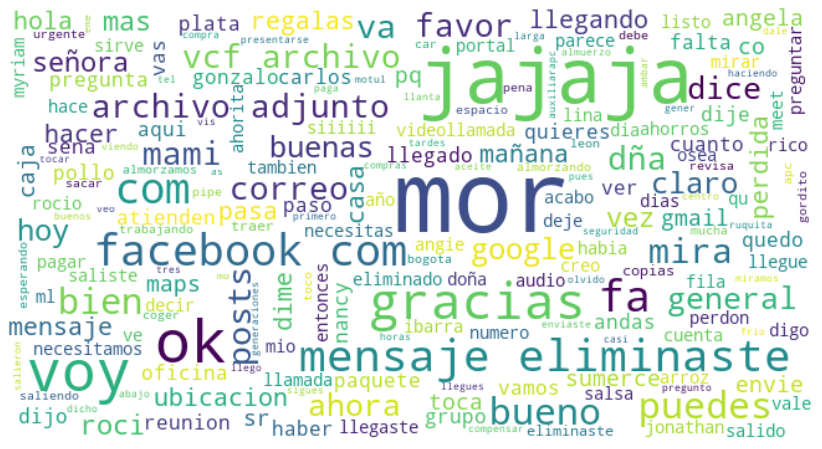

In [56]:
# Generate a word cloud image, 
wordcloud = WordCloud(stopwords=stop_words_sp, background_color="white", width=650, height=350, max_font_size=80, collocation_threshold=100,  normalize_plurals=False).generate(textomensajes)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [57]:
textomismensajes = df2[df2['Remitente']==mi_nombre]['Mensaje'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)

textomismensajes = textomismensajes.translate(trans)


textomismensajes = re.sub('\s*(j*a*ja\w*)\s\w*|(j*a*ja\w*)$', '\\1-jajaja ', textomismensajes)


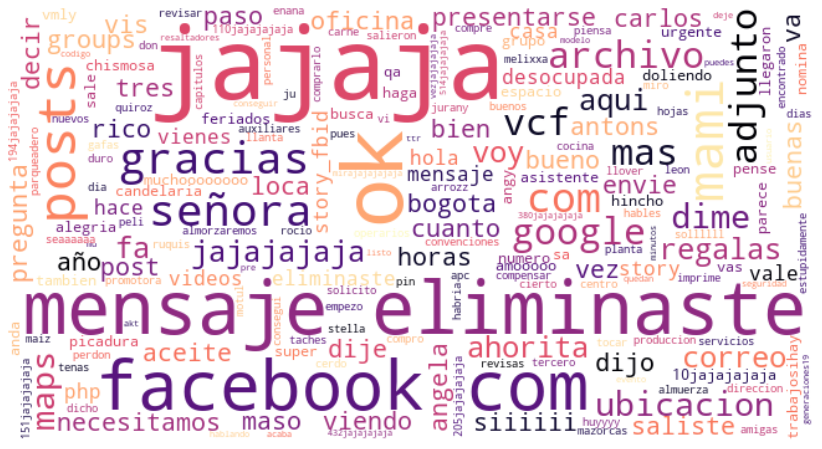

In [58]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words_sp, background_color="white", width=650, height=350, max_font_size=80, colormap="magma", collocation_threshold=100,  normalize_plurals=False).generate(textomismensajes)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
textosusmensajes = df2[df2['Remitente']!=mi_nombre]['Mensaje'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)

textosusmensajes = textosusmensajes.translate(trans)
textosusmensajes = re.sub('\s*(j*a*ja\w*)\s\w*|(j*a*ja\w*)$', '\\1-jajaja ', textosusmensajes)


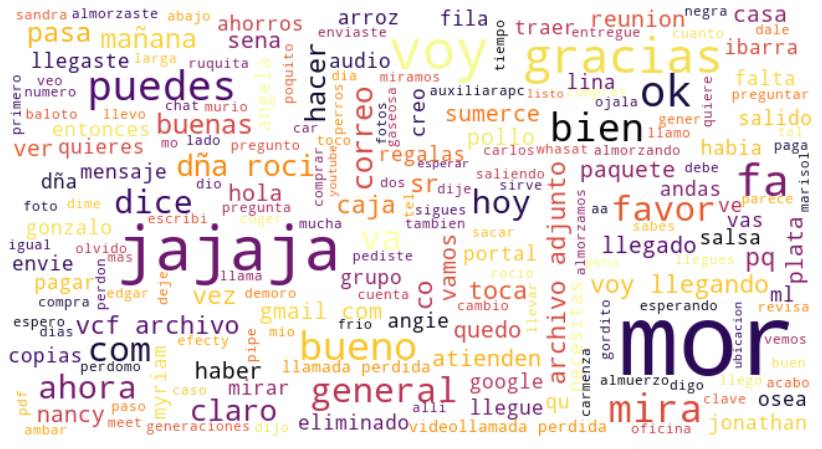

In [60]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words_sp, background_color="white", width=650, height=350, max_font_size=80, colormap="inferno",  normalize_plurals=False).generate(textosusmensajes)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()